In [1]:
import pandas as pd
import numpy as np
import scipy
from statsmodels.api import tsa
from statsmodels.tsa.statespace import sarimax
import statsmodels.graphics as sg
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_tcs = pd.read_csv('TCS_20200303.csv', index_col=0, parse_dates=True)
data_tcs = data_tcs[~data_tcs.index.duplicated()].asfreq('B')
data_tgr = pd.read_csv('NIFTY_TATA_GROUP_20200303.csv', index_col=0, parse_dates=True).asfreq('B')
data_it = pd.read_csv('NIFTY_IT.csv', index_col=0, parse_dates=True).asfreq('B')

In [4]:
start_date = max(min(df.index) for df in [data_tcs, data_tgr, data_it])

In [5]:
pd.options.display.max_rows = 280

In [6]:
pd.concat([data_tcs.loc[data_tcs['Close'].isna(), []].assign(data='tcs', n=1),
           data_tgr.loc[data_tgr['Close'].isna(), []].assign(data='tgr', n=1),
           data_it.loc[data_it['Close'].isna(), []].assign(data='it', n=1)]).pivot(columns='data', values='n')

data,it,tcs,tgr
1999-01-20,1.0,NaN,NaN
1999-01-26,1.0,NaN,NaN
1999-03-02,1.0,NaN,NaN
1999-03-18,1.0,NaN,NaN
1999-03-25,1.0,NaN,NaN
1999-03-29,1.0,NaN,NaN
1999-04-02,1.0,NaN,NaN
1999-04-14,1.0,NaN,NaN
1999-04-27,1.0,NaN,NaN
1999-04-30,1.0,NaN,NaN


In [7]:
is_missing = data_tcs['Close'].isna()
data_tcs.loc[~is_missing, ['Close']].groupby(data_tcs[~is_missing].index.year).count()

,Close
2004,89
2005,249
2006,247
2007,249
2008,246
2009,242
2010,251
2011,247
2012,247
2013,248


c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


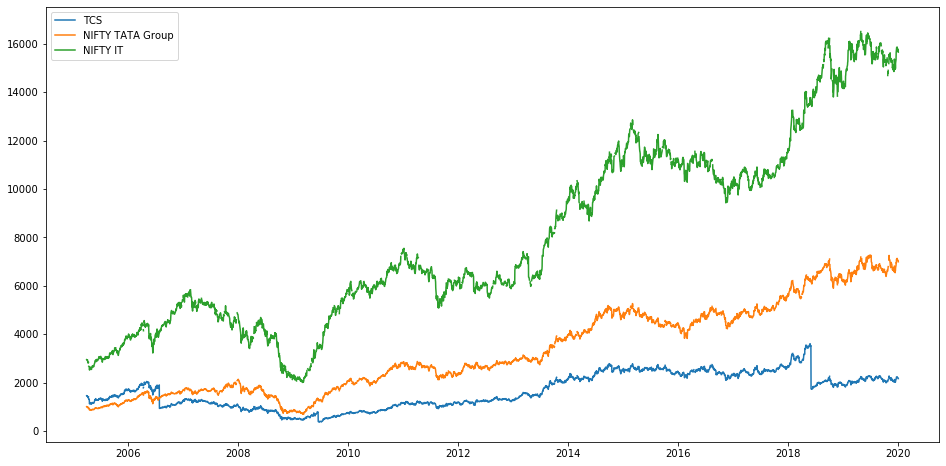

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
ax1.plot(data_tcs.index[data_tcs.index >= start_date], 
         data_tcs.loc[start_date:, 'Close'], label='TCS')
ax1.plot(data_tgr.index[data_tgr.index >= start_date], 
         data_tgr.loc[start_date:, 'Close'], label='NIFTY TATA Group')
ax1.plot(data_it.index[data_it.index >= start_date], 
         data_it.loc[start_date:, 'Close'], label='NIFTY IT')
ax1.legend()
fig.show()

c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


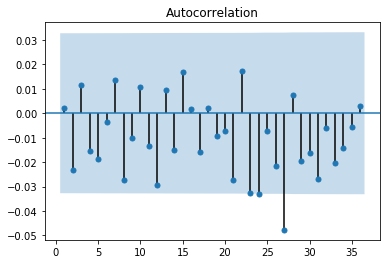

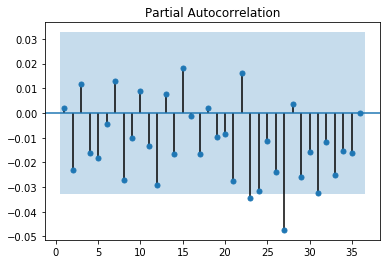

In [9]:
sg.tsaplots.plot_acf(data_tcs.Close.diff().dropna(), unbiased=True, zero=False).show()
sg.tsaplots.plot_pacf(data_tcs.Close.diff().dropna(), zero=False).show()

In [10]:
print(data_tcs.Close.std())
print(data_tcs.Close.diff().std())
print(data_tcs.Close.diff().diff().std())
print(data_tcs.Close.diff().diff().diff().std())

701.8215109331344
44.46927780663109
63.73573155402383
111.66202659290813


In [11]:
print(np.where(tsa.stattools.acf(data_tcs.Close.diff().dropna(), unbiased=True, nlags=50) < -0.04))
print(np.where(tsa.stattools.acf(data_tcs.Close.diff().dropna(), unbiased=True, nlags=50) > 0.04))

(array([27], dtype=int64),)
(array([0], dtype=int64),)


c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [12]:
print(np.where(tsa.stattools.acf(data_tcs.Close.diff().dropna(), unbiased=True, nlags=300) > 0.05))
print(np.where(tsa.stattools.acf(data_tcs.Close.diff().dropna(), unbiased=True, nlags=300) < -0.05))
print(np.where(tsa.stattools.pacf(data_tcs.Close.diff().dropna(), nlags=300) > 0.05))
print(np.where(tsa.stattools.pacf(data_tcs.Close.diff().dropna(), nlags=300) < -0.05))

(array([0], dtype=int64),)
(array([64], dtype=int64),)
(array([0], dtype=int64),)
(array([ 64, 205], dtype=int64),)


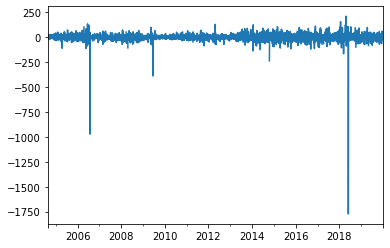

In [13]:
data_tcs.Close.diff().plot()

In [14]:
data_tcs['Close'].groupby(by=[data_tcs.index.year, data_tcs.index.month]).count()[1:].mean()

20.565217391304348

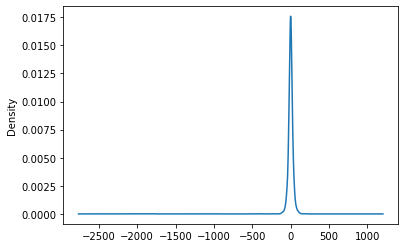

In [15]:
data_tcs['Close'].dropna().diff().plot(kind='kde')

In [16]:
print(scipy.stats.jarque_bera(data_tcs['Close'].dropna().diff().dropna()))
print(scipy.stats.normaltest(data_tcs['Close'].dropna().diff().dropna()))
print(scipy.stats.shapiro(data_tcs['Close'].dropna().diff().dropna()))

(92236230.47916731, 0.0)
NormaltestResult(statistic=8485.32321264885, pvalue=0.0)
(0.4849516749382019, 0.0)


((array([-3.56350443, -3.3237223 , -3.19133327, ...,  3.19133327,
          3.3237223 ,  3.56350443]),
  array([-1773.05,  -971.25,  -388.85, ...,   134.45,   157.1 ,   211.3 ])),
 (30.49808747643888, 0.3098600844772931, 0.6934724926118728))

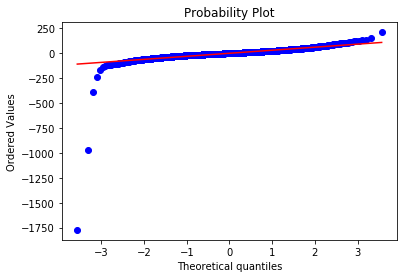

In [17]:
scipy.stats.probplot(data_tcs['Close'].dropna().diff().dropna(), dist='norm', plot=plt)

In [18]:
norm_loc, norm_scale = scipy.stats.norm.fit(data_tcs['Close'].dropna().diff().dropna())
scipy.stats.kstest(data_tcs['Close'].dropna().diff().dropna(), 'norm', args = (norm_loc, norm_scale))

KstestResult(statistic=0.15830662037973448, pvalue=6.998385911571218e-83)

((array([-7.91305069, -7.02626184, -6.55979343, ...,  6.55979343,
          7.02626184,  7.91305069]),
  array([-1773.05,  -971.25,  -388.85, ...,   134.45,   157.1 ,   211.3 ])),
 (23.022344058883, 0.3098600844772912, 0.7388293482515087))

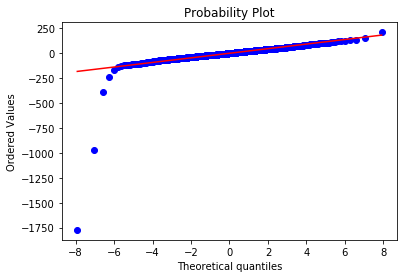

In [19]:
scipy.stats.probplot(data_tcs['Close'].dropna().diff().dropna(), dist='laplace', plot=plt)

In [20]:
scipy.stats.describe(data_tcs['Close'].dropna().diff().dropna())

DescribeResult(nobs=3788, minmax=(-1773.05, 211.29999999999973), mean=0.3098600844772967, variance=1931.33811571847, skewness=-20.375428386703692, kurtosis=763.3671616636719)

In [21]:
lap_loc, lap_scale = scipy.stats.laplace.fit(data_tcs['Close'].dropna().diff().dropna())
scipy.stats.kstest(data_tcs['Close'].dropna().diff().dropna(), 'laplace', args = (lap_loc, lap_scale))

KstestResult(statistic=0.022566509033926957, pvalue=0.042217519194495914)

In [22]:
ts_model = sarimax.SARIMAX(data_tcs.Close.dropna(), 
                           order=(0,1,0), 
                           seasonal_order=(0,0,1,27),
                           trend='ct').fit()

c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\hand\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
ts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                 3789
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 27)   Log Likelihood              -19704.379
Date:                              Mon, 16 Mar 2020   AIC                          39416.759
Time:                                      23:59:18   BIC                          39441.717
Sample:                                           0   HQIC                         39425.630
                                             - 3789                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3924      1.682      0.233      0.816      -2.904       3.689
drift       -4.36e-05      0.001     -0.064      0.949      -0.001       0.001
ma.S.L27      -0.0013      0.023     -0.056      0.955      -0.047       0.044
sigma2      1930.8260      3.805    507.417      0.000    1923.368    1938.284
===================================================================================
Ljung-Box (Q):                       54.11   Jarque-Bera (JB):          92210382.69
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               2.47   Skew:                           -20.37
Prob(H) (two-sided):                  0.00   Kurtosis:                       766.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

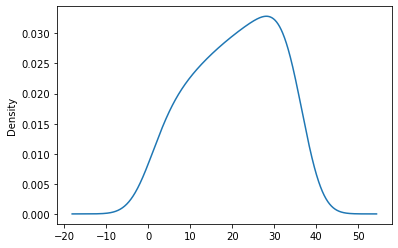

In [31]:
pd.Series(scipy.stats.boxcox(np.arange(1, 100))[0]).plot(kind='kde')

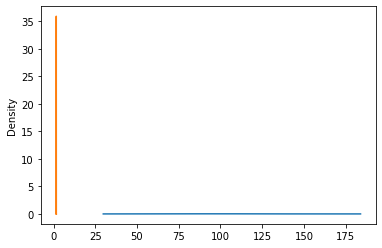

In [57]:
np.random.seed(1324)
arr = np.random.laplace(0, 10, 100) + 100
pd.Series(arr).plot(kind='kde')
pd.Series(scipy.stats.boxcox(arr)[0]).plot(kind='kde')

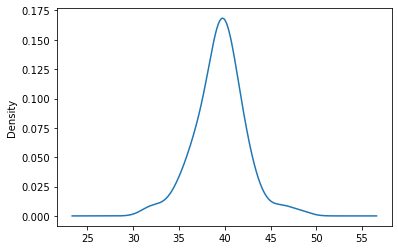

In [54]:
np.random.seed(1324)
arr = 
pd.Series(scipy.stats.boxcox()[0]).plot(kind='kde')